In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('../data/1_predicted_category_documents.csv')

if "PY" not in df.columns:
    import django, sys, os
    sys.path.append('/home/max/software/django-tmv/tmv_mcc-apsis/BasicBrowser')
    os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
    django.setup()

    from scoping.models import *

    pydf = df.sort_values('id')
    pys = Doc.objects.filter(id__in=pydf['id']).order_by('PY').values_list('PY',flat=True)
    pydf['PY'] = pys
    df = pydf.sort_index()
    
    df.to_csv('../data/1_predicted_category_documents.csv', index=False)

print(df.shape)

df = df.merge(pd.read_csv('../data/1_document_relevance.csv'))
df.head()

(95916, 296)


,Unnamed: 0,id,content,title,wosarticle__de,wosarticle__wc,ar5,seen,relevant,random_sample,...,2 - 2.4. Sensitivity - upper_pred,2 - 2.5. Detection of a regional climate trend (no attribution) - mean_prediction,2 - 2.5. Detection of a regional climate trend (no attribution) - std_prediction,2 - 2.5. Detection of a regional climate trend (no attribution) - lower_pred,2 - 2.5. Detection of a regional climate trend (no attribution) - upper_pred,PY,0 - relevance - mean_prediction,0 - relevance - std_prediction,0 - relevance - lower_pred,0 - relevance - upper_pred
0,0,13201,It is still difficult to confirm from availabl...,An Overview of Extreme Hot Weather Incidents a...,heatwave; extreme hot weather; natural ventila...,['Construction & Building Technology; Energy &...,NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,1992.0,0.478993,0.042110,0.436883,0.521102
1,1,667001,Low-centered ice wedge polygons in the Big Lak...,Field observations of syngenetic ice wedge pol...,syngenetic ice wedge; ice-wedge growth; ice-we...,"['Geosciences, Multidisciplinary']",NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2012.0,0.693710,0.039792,0.653918,0.733502
2,2,780990,Shallow marine ecosystems naturally experience...,Reef calcifiers are adapted to episodic heat s...,NaN,['Multidisciplinary Sciences'],NaN,0.0,0.0,0,...,1.0,0.0,0.0,0.0,0.0,2013.0,0.712123,0.041321,0.670802,0.753444
3,3,1544528,Trichocomaceae family encompasses the greatest...,DIVERSITY OF ISOLATED Trichocomaceae FROM SOIL...,Trichocomaceae; Pinus elliottii; Corymbia citr...,['Plant Sciences; Forestry'],NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2017.0,0.622783,0.047144,0.575639,0.669928
4,4,1291826,Climate research in Portugal is often constrai...,High-Resolution Temperature Datasets in Portug...,Climatology; Temperature; Interpolation scheme...,['Meteorology & Atmospheric Sciences'],NaN,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,2014.0,0.549283,0.034545,0.514738,0.583827


In [22]:
continents = df.groupby('continent').size().sort_values()
continents

continent
South America     4196
Africa            6145
Oceania           6589
Europe           14776
Asia             16747
North America    23996
dtype: int64

In [23]:
df[pd.isna(df["continent"])].shape

(41372, 298)

In [24]:
py_range = range(1990,2023)
y = []
cumsum = False
for c in continents.index:
    cy = []
    for py in py_range:
        cy.append(df.loc[(df['continent']==c) & (df["PY"]==py)].shape[0])
    cy = np.array(cy)
    if cumsum:
        cy = cy.cumsum()
    y.append(cy)

include_na = True
if include_na:
    cy = []
    for py in py_range:
        cy.append(df.loc[(pd.isna(df['continent']) & (df['PY']==py))].shape[0])
    cy = np.array(cy)
    if cumsum:
        cy = cy.cumsum()
    y.append(cy)
    labels = list(continents.index) + ["Unknown"]
y = np.array(y)

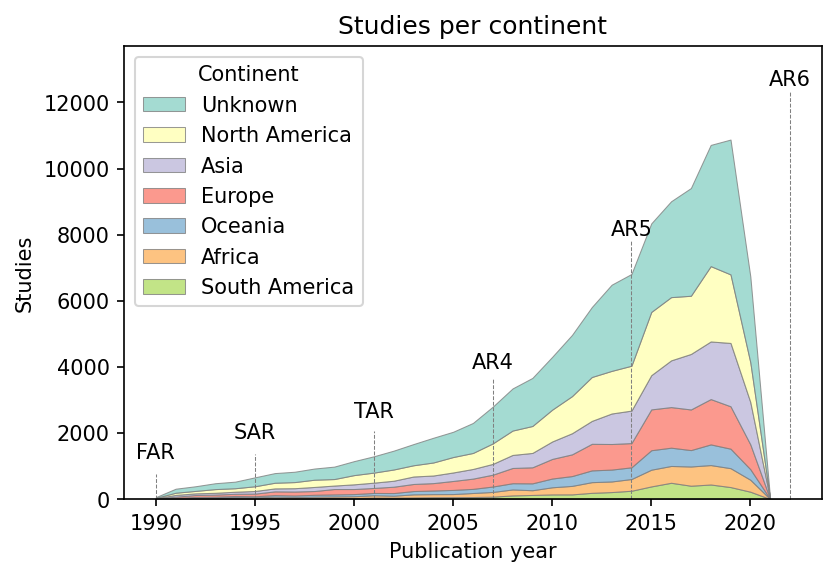

In [25]:
fig, ax = plt.subplots(dpi=150)

cols = ['#8dd3c7','#ffffb3','#bebada','#fb8072','#80b1d3','#fdb462','#b3de69']
cols.reverse()

ax.stackplot(py_range, y, labels=labels, alpha=0.8, colors=cols, edgecolor="grey", linewidth=0.5)

ah, al = ax.get_legend_handles_labels()
ax.legend(ah[::-1], al[::-1], title='Continent', loc='upper left')

report_dates = [1990, 1995, 2001, 2007, 2014, 2022]
report_labels = ["FAR", "SAR", "TAR", "AR4", "AR5", "AR6"]

ymax = y.sum(axis=0).max()*1.2

for d, l in zip(report_dates, report_labels):
    idx = py_range.index(d)
    if l=="AR6":
        ax.axvline(d, ymax=0.9,color="grey",lw=0.5, ls="--")
        ax.text(d, ymax*0.95, l, va="bottom", ha="center")
    else:
        ax.axvline(d, ymax=y[:,idx].sum()/ymax+0.05,color="grey",lw=0.5, ls="--")
        ax.text(d, y[:,idx].sum()+ ymax*0.08, l, va="bottom", ha="center")
    
if cumsum:
    ax.set_title("Cumulative sum of studies per continent")   
else:
    ax.set_title("Studies per continent")
    

ax.set_ylabel("Studies")
ax.set_xlabel("Publication year")

ax.set_ylim(ymax=ax.get_ylim()[1]*1.2)

ylim = ax.get_ylim()
xlim = ax.get_xlim()


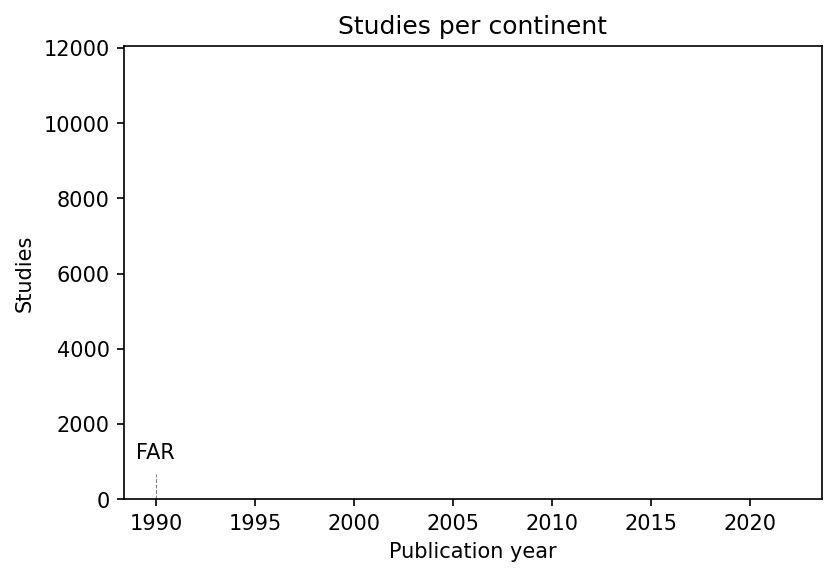

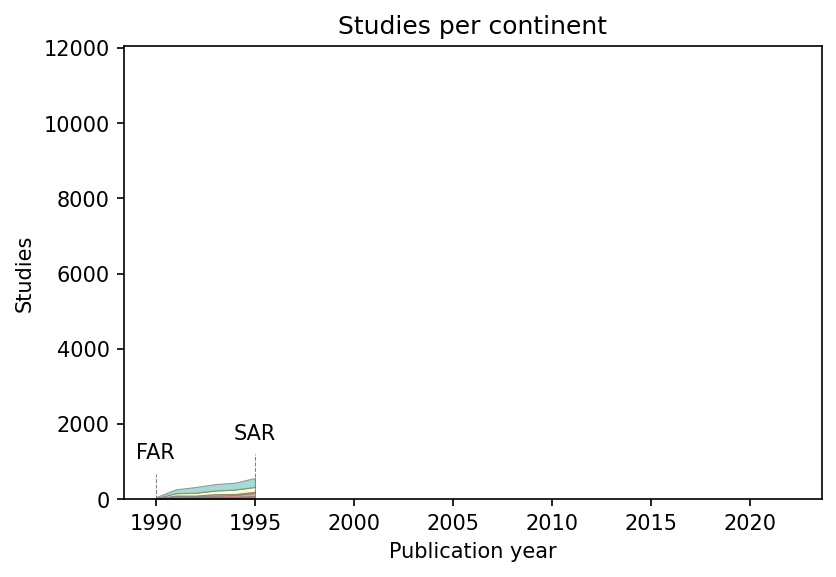

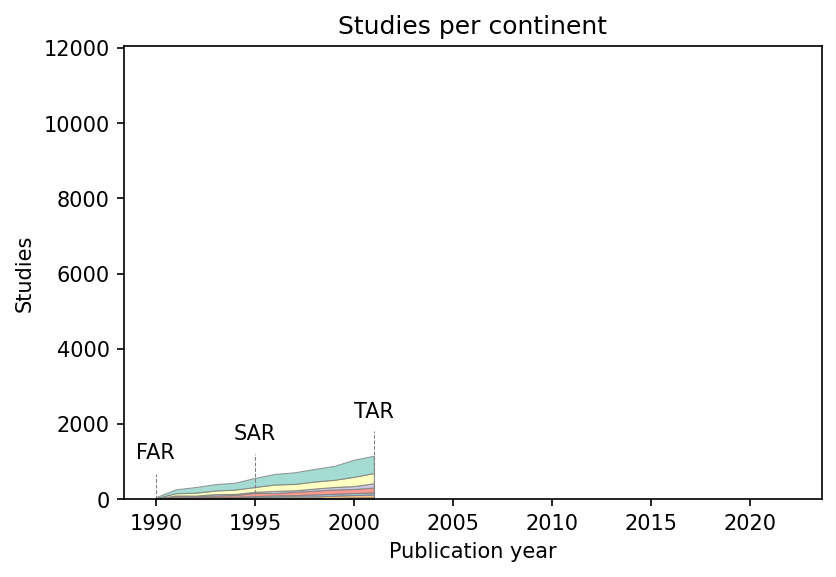

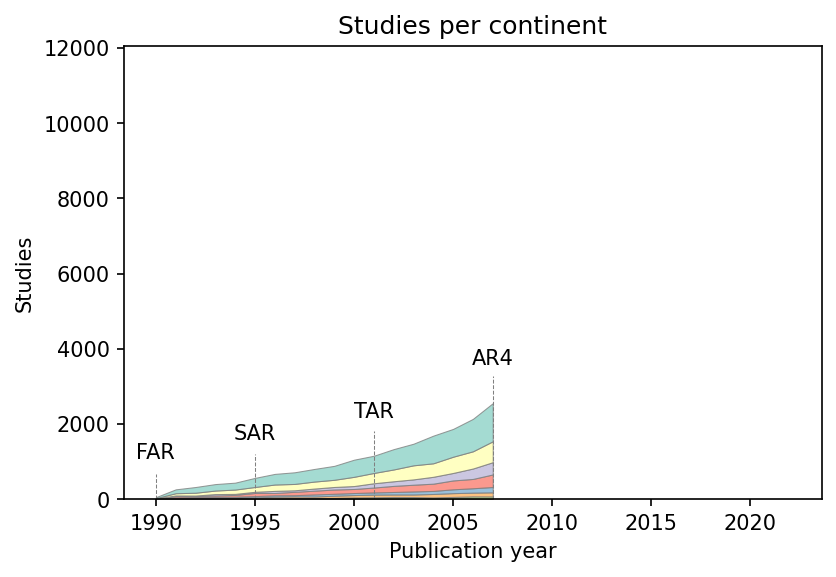

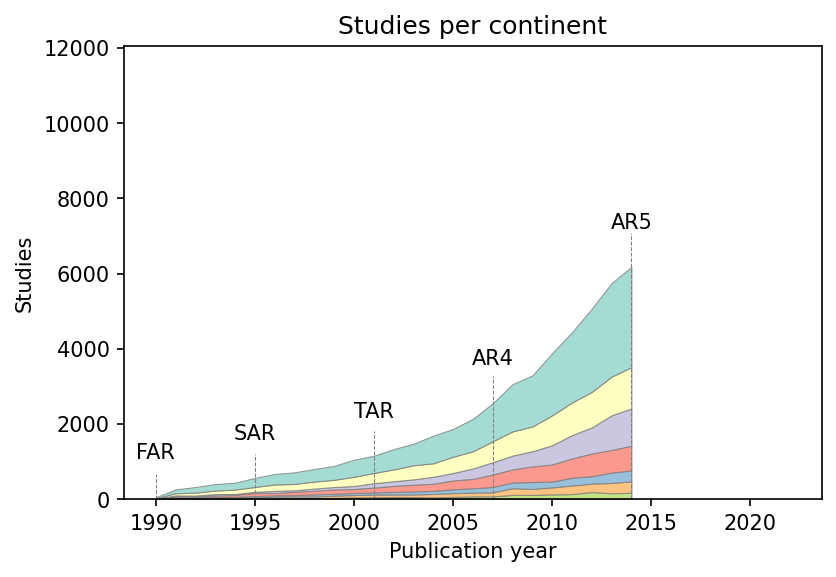

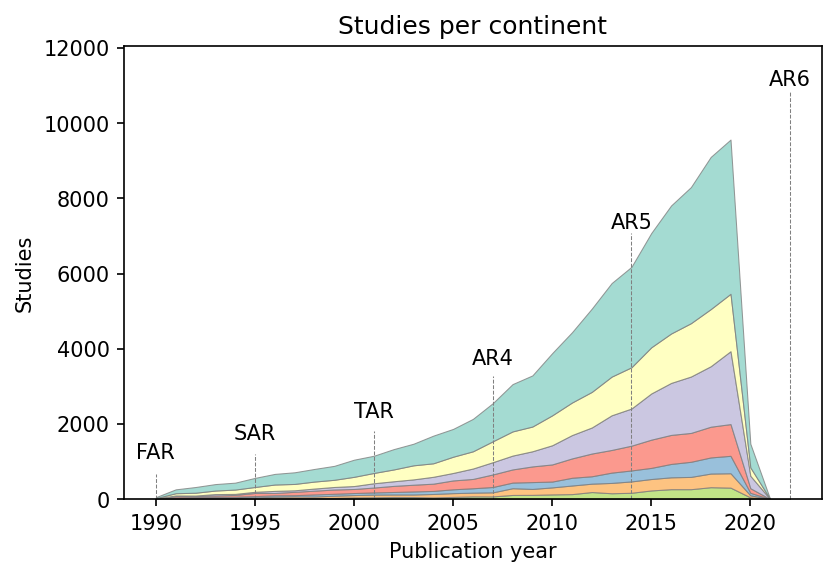

In [137]:
for i, date in enumerate(report_dates):
    
    fig, ax = plt.subplots(dpi=150)
    
    idx = py_range.index(date)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    
    ax.stackplot(py_range[:idx+1], y[:,:idx+1], labels=labels, alpha=0.8, colors=cols, edgecolor="grey", linewidth=0.5)
    
    for d, l in zip(report_dates[:i+1], report_labels[:i+1]):
        idx = py_range.index(d)
        if l=="AR6":
            ax.axvline(d, ymax=0.9,color="grey",lw=0.5, ls="--")
            ax.text(d, ymax*0.95, l, va="bottom", ha="center")
        else:
            ax.axvline(d, ymax=y[:,idx].sum()/ymax+0.05,color="grey",lw=0.5, ls="--")
            ax.text(d, y[:,idx].sum()+ ymax*0.08, l, va="bottom", ha="center")
            
            
    if cumsum:
        ax.set_title("Cumulative sum of studies per continent")   
    else:
        ax.set_title("Studies per continent")


    ax.set_ylabel("Studies")
    ax.set_xlabel("Publication year")